# Finding Best Market for Adv.

In this project i will try to find best market for advertisement of a Ed-Tech company which offers cources on programming skills.

**Tentative Timeline:**
1. 
2. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 


In [2]:
fcc = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=0)


In [3]:
 def explore_data(dataset, hed=False):
        pd.options.display.max_columns = 150 # to avoid truncated output 
        if(hed):
            dataset.head()
        print("\ncount of missing values for each column\n")
        ser = dataset[dataset.isnull()].sum()
        print(ser[ser>0])
        dataset.info()
            


In [4]:
explore_data(fcc,True)



count of missing values for each column

Series([], dtype: float64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [5]:
# type(fcc.info())
# pd.options.display.max_columns = 150 # to avoid truncated output 
# fcc.head()

In [6]:
fcc['JobRoleInterest'].value_counts(normalize=True)*100


Full-Stack Web Developer                                                                                                                                                                11.770595
  Front-End Web Developer                                                                                                                                                                6.435927
  Data Scientist                                                                                                                                                                         2.173913
Back-End Web Developer                                                                                                                                                                   2.030892
  Mobile Developer                                                                                                                                                                       1.673341
Game Developer                

In [7]:
plt.style.use('fivethirtyeight')

In [8]:
rols = fcc['JobRoleInterest'].str.lower().unique()
my_rols = ['web','data','devops','mobile','app','game','user','security']
rols

array([nan, 'full-stack web developer',
       '  front-end web developer, back-end web developer,   devops / sysadmin,   mobile developer, full-stack web developer',
       ...,
       '  data scientist, game developer,   quality assurance engineer',
       'back-end web developer, data engineer,   data scientist,   devops / sysadmin',
       '  devops / sysadmin,   mobile developer,   product manager, game developer,   front-end web developer, data engineer,   quality assurance engineer,   user experience designer, back-end web developer,   data scientist, full-stack web developer, information security, it specialist '],
      dtype=object)

In [9]:
# making costomized freequency table: # match for non case sensitive.
def ser_freq(parameter,data):         
    ser = pd.Series(0,index=parameter)
    for i in parameter:
        ser[i] = data.str.contains(i,case=0).sum()
    return ser
        
        
    

In [10]:
tabl = ser_freq(my_rols,fcc['JobRoleInterest'])
(tabl/sum(tabl) )*100
# tabl.index

web         37.241513
data        13.373704
devops       5.971784
mobile      14.848934
app          0.051536
game        10.494106
user         9.469819
security     8.548605
dtype: float64

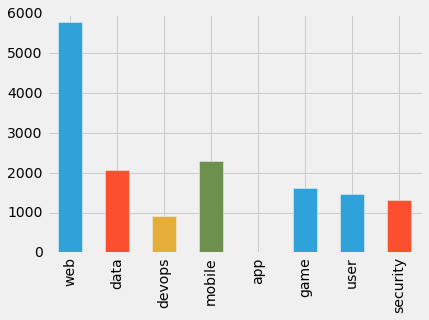

In [11]:
tabl.plot(kind='bar')


from above working:

1. there are students who are interested in multiple domins.
2. our focous is on web related cources so there are almose 6000 students who are interested in learning.

# Location based analysis


In [12]:
fcc['CountryLive'].value_counts()

United States of America         5791
India                            1400
United Kingdom                    757
Canada                            616
Brazil                            364
Germany                           324
Poland                            265
Russia                            263
Australia                         259
France                            228
Spain                             217
Nigeria                           214
Ukraine                           202
Romania                           171
Italy                             164
Mexico                            155
Netherlands (Holland, Europe)     142
Philippines                       135
South Africa                      126
Turkey                            120
Greece                            116
Serbia                            115
Argentina                         113
Pakistan                          109
Kenya                              92
Indonesia                          91
China       

In [13]:
fcc = fcc[fcc['JobRoleInterest'].notnull()].copy()
count = fcc['CountryLive'].value_counts()
relative = fcc['CountryLive'].value_counts(normalize=1)*100

summary = pd.DataFrame(data = {'counts':count,'rel_freq':relative})
summary.head()

,counts,rel_freq
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


** These are top 5 counties fro adv. **

## Money spending for learning

We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

In [17]:
fcc[ ['CountryLive','MoneyForLearning','MonthsProgramming'] ].sort_values('MoneyForLearning',ascending=0)

,CountryLive,MoneyForLearning,MonthsProgramming
16650,United States of America,200000.0,12.0
8030,United States of America,120000.0,36.0
2478,United States of America,100000.0,2.0
15587,India,100000.0,24.0
4614,Bangladesh,100000.0,24.0
14024,United States of America,80000.0,1.0
7198,United States of America,70000.0,5.0
9435,United States of America,69000.0,60.0
3930,United States of America,65000.0,6.0
1755,India,50000.0,15.0


In [20]:
fcc['MonthsProgramming'].replace(0,1,inplace=True)

In [21]:
fcc['MonthsProgramming'].value_counts(0)

1.0      1002
2.0       669
6.0       654
3.0       637
12.0      616
24.0      422
4.0       367
5.0       279
36.0      251
8.0       195
18.0      160
10.0      144
7.0       124
48.0      112
9.0       102
20.0       92
30.0       82
60.0       79
14.0       76
15.0       70
16.0       58
40.0       43
11.0       39
13.0       36
50.0       29
72.0       28
17.0       20
26.0       17
28.0       13
120.0      13
         ... 
31.0        2
33.0        2
37.0        2
59.0        2
156.0       2
108.0       2
69.0        1
56.0        1
73.0        1
41.0        1
83.0        1
89.0        1
111.0       1
124.0       1
46.0        1
408.0       1
300.0       1
370.0       1
264.0       1
58.0        1
86.0        1
180.0       1
43.0        1
190.0       1
113.0       1
49.0        1
171.0       1
198.0       1
105.0       1
51.0        1
Name: MonthsProgramming, Length: 90, dtype: int64

In [25]:
fcc['money_per_month'] = fcc['MoneyForLearning']/fcc['MonthsProgramming']
fcc['money_per_month'].value_counts(dropna=0)


 0.000000        3092
NaN               675
 50.000000        128
 25.000000        120
 16.666667        118
 100.000000       118
 33.333333        109
 8.333333         105
 20.000000         88
 10.000000         83
 83.333333         80
 166.666667        67
 12.500000         66
 4.166667          65
 5.000000          62
 200.000000        53
 500.000000        50
 66.666667         47
 41.666667         46
 250.000000        44
 1000.000000       43
 3.333333          38
 20.833333         37
 125.000000        36
 6.666667          35
 2.500000          33
 5.555556          31
 150.000000        31
 333.333333        31
 11.111111         31
                 ... 
 1.562500           1
 29.000000          1
 23.000000          1
 19.000000          1
 31.000000          1
 3.625000           1
 4.750000           1
 92.000000          1
 117.500000         1
 4.687500           1
 1142.857143        1
 0.900000           1
 866.666667         1
 1.344086           1
 1670.0000

In [36]:
valid_indexs = fcc[['CountryLive','money_per_month']].dropna(axis=1).index
# fcc_good = fcc.loc[valid_indexs].copy()
# (valid_indexs==fcc.index).sum()==fcc.shape[0]
fcc_good = fcc[(fcc['money_per_month'].notnull()&fcc['CountryLive'].notnull())].copy()

In [39]:
top5 = fcc_good['CountryLive'].value_counts().head().index

In [55]:
grp_obj = fcc_good.groupby(by ='CountryLive',axis=0)
mn = grp_obj.mean()
mn.head()
means = mn['money_per_month'][top5]
# mods = grp_obj.median()
# mods['money_per_month'][top5]
means

United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Poland                       75.678935
Name: money_per_month, dtype: float64

Truth is that people in UK are rich but they are spending very low money so there might be outliears or some error

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

## Dealing with outliars

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



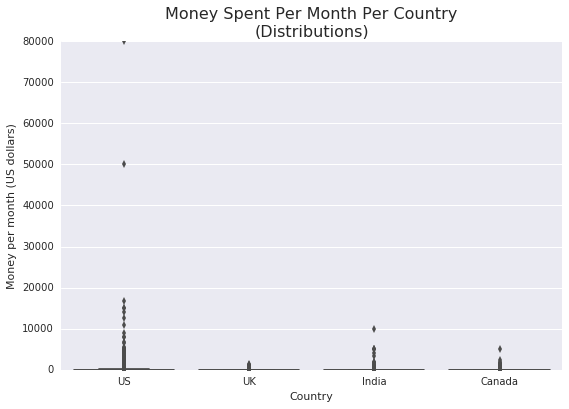

In [60]:
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
# avoids tick labels overlap
plt.show()


In [63]:
only_4[only_4['CountryLive']=='United States of America']['money_per_month'].describe()

count     2933.000000
mean       227.997996
std       1940.245614
min          0.000000
25%          0.000000
50%          3.333333
75%         50.000000
max      80000.000000
Name: money_per_month, dtype: float64

In [64]:
only_4 = only_4[only_4['money_per_month']<=20000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



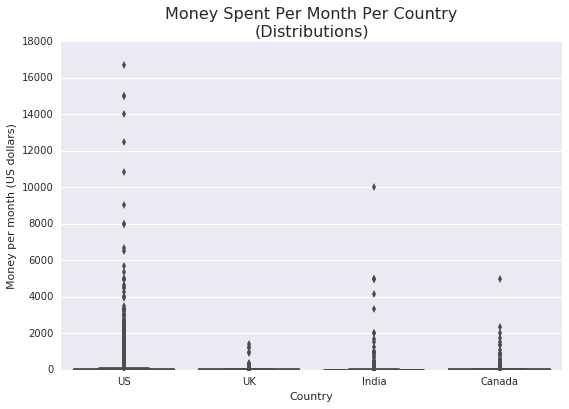

In [65]:
import seaborn as sns
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) 
# avoids tick labels overlap
plt.show()


In [66]:
only_4 = only_4.drop(only_4[only_4['money_per_month']>2500].index)

In [67]:
to_drop =     ((only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0))

only_4 = only_4.drop(only_4[to_drop].index)


In [68]:
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['money_per_month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [69]:
only_4.groupby(by='CountryLive').mean()['money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    102.882536
Name: money_per_month, dtype: float64

In [72]:
pop = only_4['CountryLive'].value_counts(normalize=True)*100
mon = only_4.groupby(by='CountryLive').mean()['money_per_month']

summary = pd.DataFrame(data = {'Population':pop,'Money_spendings':mon})
summary.sort_values('Money_spendings',ascending=False)

,Money_spendings,Population
United States of America,102.882536,74.767081
Canada,93.065400,6.185300
India,65.758763,11.827122
United Kingdom,45.534443,7.220497


## Conclusion

The above dataframe is final summary.
we should adv in 
    1. US,
    2. Canada,
    3. India.
